<a href="https://colab.research.google.com/github/IA2021UR/practica-3-joferne/blob/main/practica3_ampliacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3 Ampliación I: Comparando algoritmos de clustering en nubes de puntos

Como en los notebooks anteriores debes ir leyendo las explicaciones, ejecutando el código que se te proporciona, y respondiendo a los ejercicios planteados. 

Recuerda que para que los cambios se vayan guardando en tu repositorio de GitHub tienes que utilizar la opción *Save a Copy in GitHub...* del menú *File*.

Empezamos cargando varias librerías que nos servirán para generar nubes de puntos, y también para visualizarlas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import cycle, islice
%matplotlib inline

Como vamos a generar nubes de puntos de manera aleatoria fijamos la semilla para obtener los mismos puntos cada vez que ejecutemos este programa.

In [2]:
np.random.seed(42)

A continuación vamos a generar varios datasets que sean lo suficientemente grandes como para ver la escalabilidad de los algoritmos, pero que no sean excesivamente grandes, para evitar grandes tiempos de ejecución. En concreto cada dataset constará de 1500 puntos

In [3]:
n_puntos = 1500

Generamos un dataset de círculos y lo mostramos

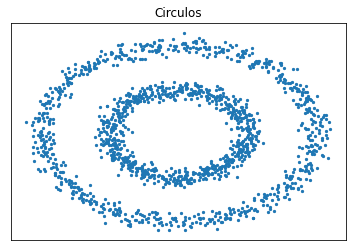

In [4]:
circulos,_ = datasets.make_circles(n_samples=n_puntos,factor=.5,noise=0.05)
plt.figure()
plt.title('Circulos')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5)
plt.xticks(())
plt.yticks(())
plt.show()

Generamos un dataset de lunas y lo mostramos

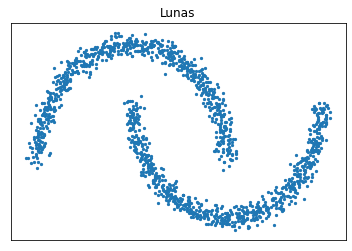

In [5]:
lunas,_ =  datasets.make_moons(n_samples=n_puntos, noise=.05)
plt.figure()
plt.title('Lunas')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5)
plt.xticks(())
plt.yticks(())
plt.show()

Generamos un dataset de bolas y lo mostramos

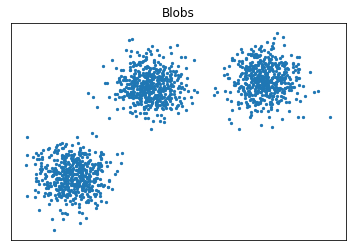

In [6]:
blobs,_ = datasets.make_blobs(n_samples=n_puntos,random_state=170)
plt.figure()
plt.title('Blobs')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5)
plt.xticks(())
plt.yticks(())
plt.show()

Por último, generamos un dataset sin estructura y lo mostramos

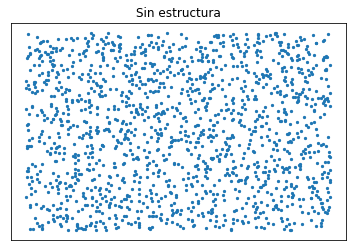

In [7]:
sin_estructura = np.random.rand(n_puntos, 2)
plt.figure()
plt.title('Sin estructura')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5)
plt.xticks(())
plt.yticks(())
plt.show()

## DBSCAN

A continuación mostramos como separa en grupos el algoritmo de DBSCAN para cada uno de los datasets.

In [8]:
from sklearn.cluster import DBSCAN
estimatorDBSCAN = DBSCAN(eps=.2)

Para el dataset de los círculos

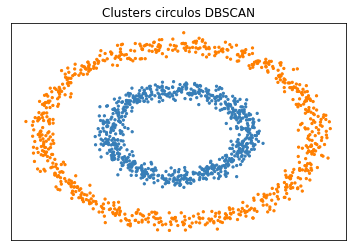

In [9]:
estimatorDBSCAN.fit(circulos)
y_pred = estimatorDBSCAN.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos DBSCAN')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Para el dataset de las lunas

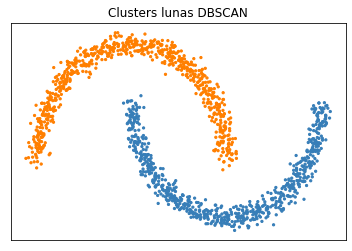

In [10]:
estimatorDBSCAN.fit(lunas)
y_pred = estimatorDBSCAN.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas DBSCAN')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Para el dataset de las bolas

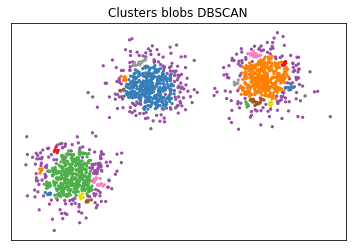

In [11]:
estimatorDBSCAN.fit(blobs)
y_pred = estimatorDBSCAN.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs DBSCAN')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Para el dataset sin estructura

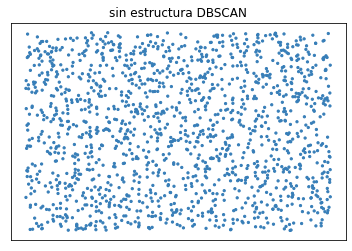

In [12]:
estimatorDBSCAN.fit(sin_estructura)
y_pred = estimatorDBSCAN.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('sin estructura DBSCAN')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

## Ejercicio

Repite lo visto para generar y mostrar los clusters usando DBSCAN para el resto de algoritmos de clustering vistos hasta el momento

KMEANS

In [13]:
from sklearn.cluster import KMeans

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def drawElbow(maxClusters,data):
    kmeans = [KMeans(n_clusters=k).fit(data) for k in range(1,maxClusters)]
    costFunction = [estimator.inertia_ for estimator in kmeans]
    plt.plot(costFunction)
    plt.title("Cost function")
    plt.show()

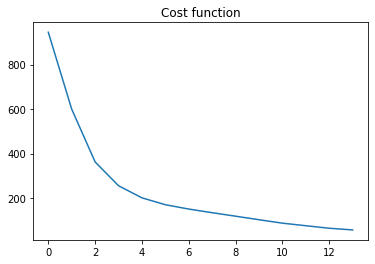

In [15]:
drawElbow(15,circulos)

Observando donde se aplana la función coste podríamos elegir entre 5 y 7 clústers. Escogemos 6.

In [16]:
estimatorKmeans = KMeans(n_clusters=6)

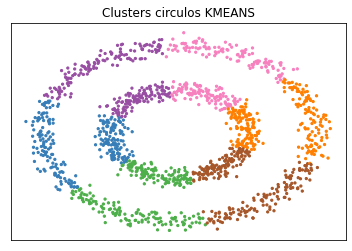

In [17]:
estimatorKmeans.fit(circulos)
y_pred = estimatorKmeans.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos KMEANS')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

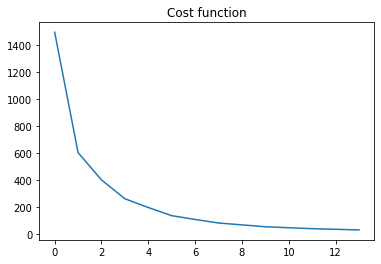

In [18]:
drawElbow(15,lunas)

Al igual que antes podríamos escoger entre 5 y 7. Elegimos 6 clústers.

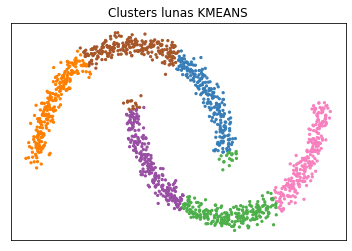

In [19]:
estimatorKmeans.fit(lunas)
y_pred = estimatorKmeans.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas KMEANS')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

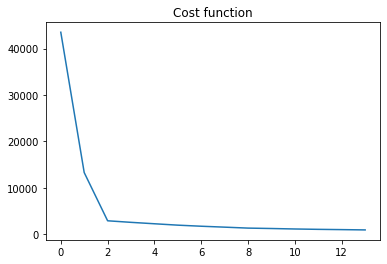

In [20]:
drawElbow(15,blobs)

Esta vez entre 2 y 4 sería suficiente. Escogemos 3 clústers.

In [21]:
estimatorKmeans = KMeans(n_clusters=3)

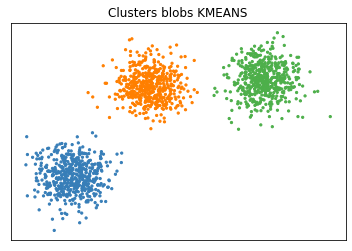

In [22]:
estimatorKmeans.fit(blobs)
y_pred = estimatorKmeans.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs KMEANS')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

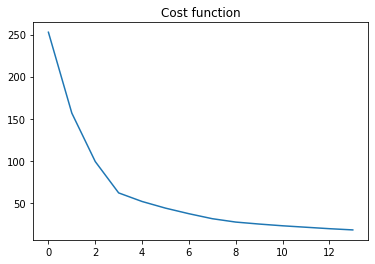

In [23]:
drawElbow(15,sin_estructura)

Entre 7 y 9 sería adecuado. Escogemos 8 clústers.

In [24]:
estimatorKmeans = KMeans(n_clusters=8)

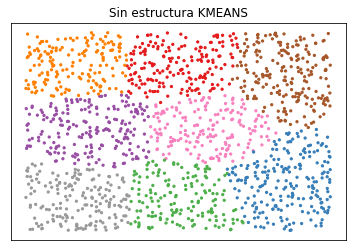

In [25]:
estimatorKmeans.fit(sin_estructura)
y_pred = estimatorKmeans.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Sin estructura KMEANS')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

MEAN SHIFT

In [26]:
from sklearn.cluster import MeanShift

In [27]:
estimatorMeanShift = MeanShift()

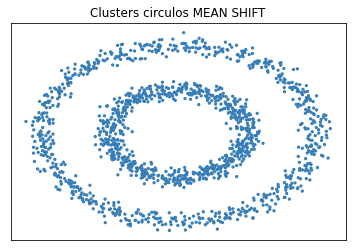

In [28]:
estimatorMeanShift.fit(circulos)
y_pred = estimatorMeanShift.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos MEAN SHIFT')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

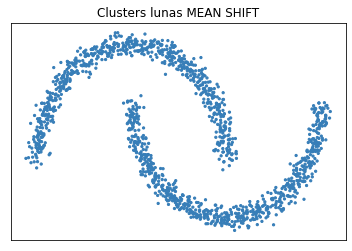

In [29]:
estimatorMeanShift.fit(lunas)
y_pred = estimatorMeanShift.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas MEAN SHIFT')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

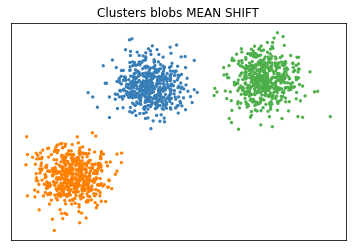

In [30]:
estimatorMeanShift.fit(blobs)
y_pred = estimatorMeanShift.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs MEAN SHIFT')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

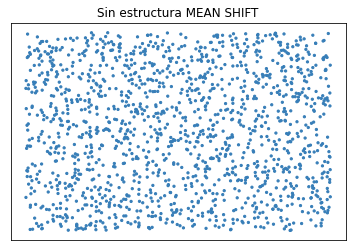

In [31]:
estimatorMeanShift.fit(sin_estructura)
y_pred = estimatorMeanShift.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Sin estructura MEAN SHIFT')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Podemos ver que este método funciona bastante mal a excepción del dataset clusterblobs.

## Ejercicio
Sklearn proporciona otros métodos de clustering: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
Utiliza alguno de esos métodos para ver los clusters que se obtienen.

Por ejemplo vamos a probar con Aglomerative Clustering.

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
estimatorAC = AgglomerativeClustering()

Por defecto toma n = 2 clústers.

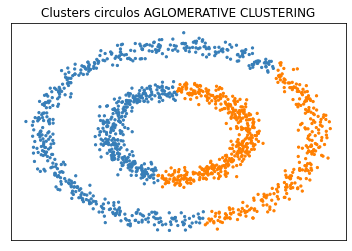

In [34]:
estimatorAC.fit(circulos)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos AGLOMERATIVE CLUSTERING')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

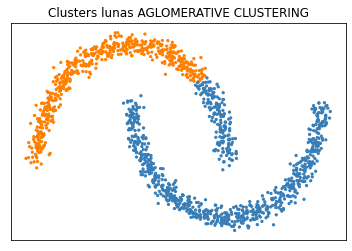

In [35]:
estimatorAC.fit(lunas)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas AGLOMERATIVE CLUSTERING')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

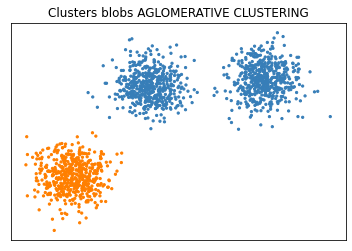

In [36]:
estimatorAC.fit(blobs)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs AGLOMERATIVE CLUSTERING')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

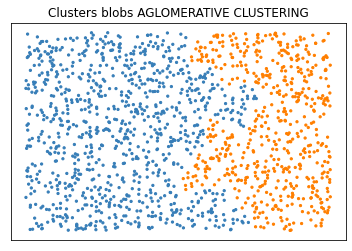

In [37]:
estimatorAC.fit(sin_estructura)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs AGLOMERATIVE CLUSTERING')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Ahora vamos a introducir manualmente que utilice 5 clústers.

In [38]:
estimatorAC = AgglomerativeClustering(n_clusters=5)

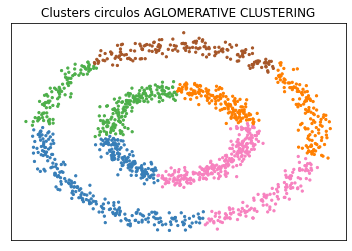

In [39]:
estimatorAC.fit(circulos)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos AGLOMERATIVE CLUSTERING')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

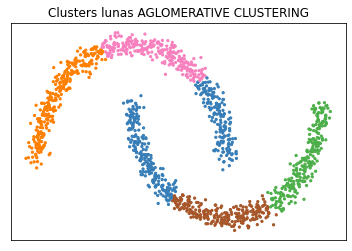

In [40]:
estimatorAC.fit(lunas)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas AGLOMERATIVE CLUSTERING')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

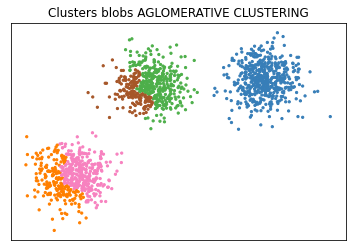

In [41]:
estimatorAC.fit(blobs)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs AGLOMERATIVE CLUSTERING')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

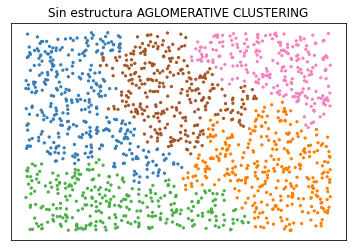

In [42]:
estimatorAC.fit(sin_estructura)
y_pred = estimatorAC.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Sin estructura AGLOMERATIVE CLUSTERING')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Veamos ahora con Birch Clustering.

In [43]:
from sklearn.cluster import Birch

In [44]:
estimatorB = Birch()

Por defecto toma n = 3 clústers.

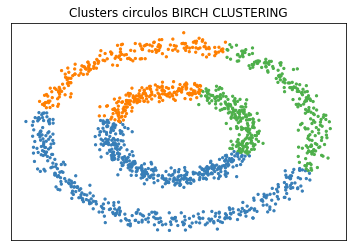

In [45]:
estimatorB.fit(circulos)
y_pred = estimatorB.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters circulos BIRCH CLUSTERING')
plt.scatter(circulos[:, 0], circulos[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

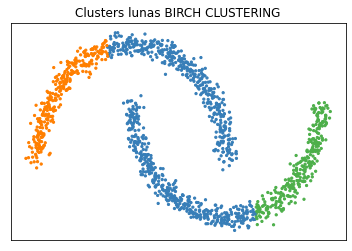

In [46]:
estimatorB.fit(lunas)
y_pred = estimatorB.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters lunas BIRCH CLUSTERING')
plt.scatter(lunas[:, 0], lunas[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

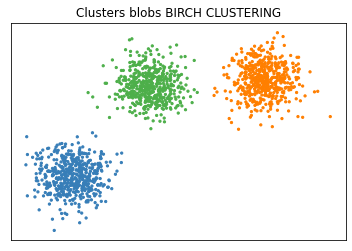

In [47]:
estimatorB.fit(blobs)
y_pred = estimatorB.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Clusters blobs BIRCH CLUSTERING')
plt.scatter(blobs[:, 0], blobs[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


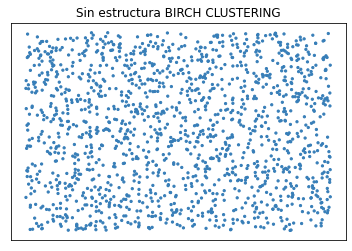

In [48]:
estimatorB.fit(sin_estructura)
y_pred = estimatorB.labels_
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
plt.figure()
plt.title('Sin estructura BIRCH CLUSTERING')
plt.scatter(sin_estructura[:, 0], sin_estructura[:, 1],s=5,color=colors[y_pred])
plt.xticks(())
plt.yticks(())
plt.show()

Guarda este fichero utilizando la opción *Save a copy in Github...* del menú *File*. 